In [1]:
from PIL import Image
import numpy as np
import math
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

# Pranav Nail

In [2]:
final_image=Image.open("Data/Pranav Nail-20190509-175851.tif")
background=Image.open("Data/BG RAW-RAW-20190509-180149.tif")
raw_image=Image.open("Data/Pranav Nail Raw-RAW-20190509-175846.tif")




(1024, 512)


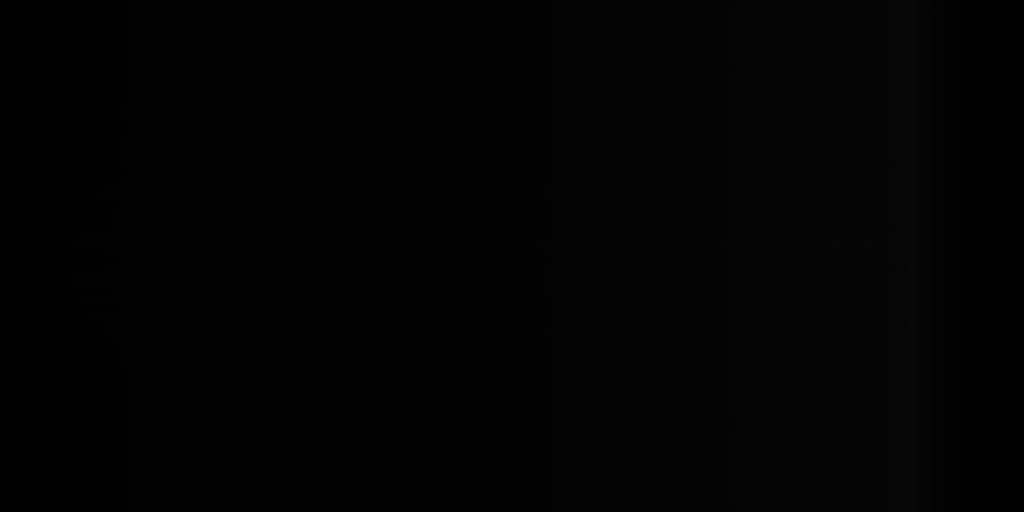

In [3]:
print(raw_image.size)
raw_image

(1024, 512)


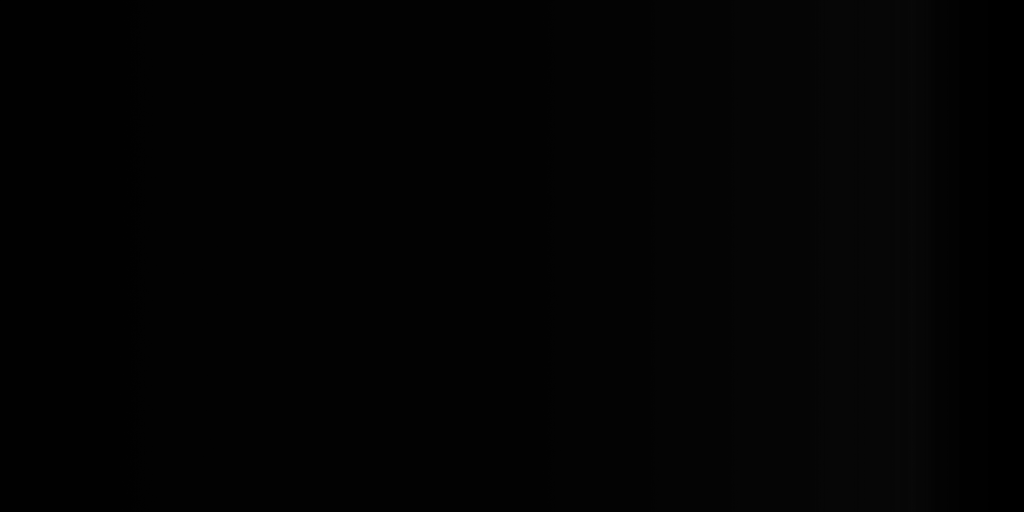

In [4]:
print(background.size)
background

(512, 512)


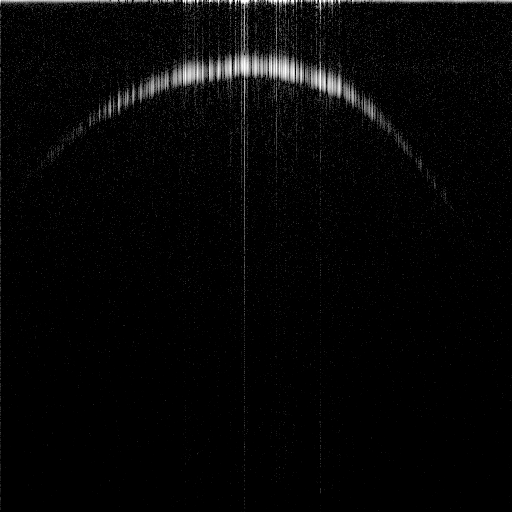

In [5]:
print(final_image.size)
final_image

In [6]:
def converting_tif_numpy(img):
    return np.array(img)


raw=converting_tif_numpy(raw_image)
bg=converting_tif_numpy(background)

## Step 2 - Background Subtraction

In this step the background image is subtracted from the raw image, leaving just the fringe.
Average across all of the A-scans in the background and then use this averaged A-scan to subtract from each A-scan in the raw file.

In [7]:
def background_subtraction(raw,bg):
    #raw and bg are numpy matrix of the same size. This function is used to subtract the background from the raw image
    
    #First have to average across all the alines in the background
    bg=np.average(raw,axis=0).astype(float).reshape((1,1024))
    
    return raw.astype(float)-bg

In [8]:
step2 = background_subtraction(raw, bg)
print(step2.shape)
print()
print(step2)

(512, 1024)

[[ 3.00714844e+02 -3.52539062e+00 -5.50390625e+00 ... -1.79687500e-01
   3.97656250e+00  2.93945312e+00]
 [-2.85156250e-01  1.47460938e+00 -8.50390625e+00 ...  1.82031250e+00
   1.97656250e+00  9.39453125e-01]
 [-1.28515625e+00 -2.52539062e+00 -3.50390625e+00 ... -1.79687500e-01
  -1.02343750e+00 -6.05468750e-02]
 ...
 [-2.28515625e+00 -5.52539062e+00 -1.50390625e+00 ... -1.79687500e-01
   9.76562500e-01 -6.05468750e-02]
 [-2.85156250e-01  2.47460938e+00  4.49609375e+00 ... -1.79687500e-01
  -2.34375000e-02  9.39453125e-01]
 [-7.28515625e+00 -3.52539062e+00 -5.50390625e+00 ... -1.79687500e-01
  -2.34375000e-02  9.39453125e-01]]


Text(0.5, 0, 'Pixel Value')

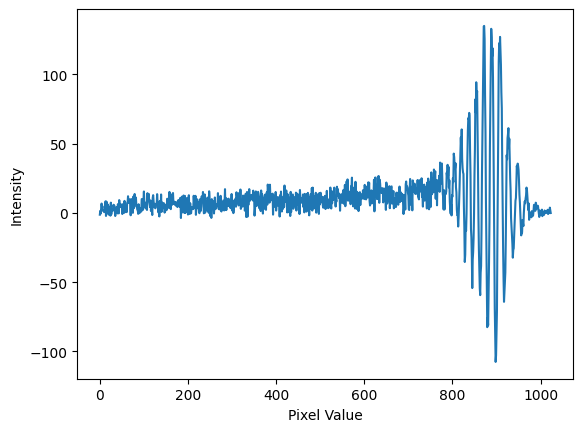

In [9]:
plt.plot(step2[255])
plt.ylabel("Intensity")
plt.xlabel("Pixel Value")

## Step 3 - Wavelength Calibration

This spectrometer has 1024 pixels. The wavelength calibration for the pixels is available on Sakai as a MAT file. Load this vector into Matlab; each element is the wavelength in nm of the corresponding pixel.

for you assignment the using the following coefficients to calibrate your spectrum

coef = [-6.1004679E-09, 5.6174655E-07, 0.105303, 807.35991]

in matlab the for function polyval(p,x) evaluates the polynomial p at each point in x. 
The argument p is a vector of length n+1 whose elements are the coefficients (in descending powers) of an nth-degree polynomial:

where p(x) = p_1*x^n + p_2*x^(n-1) + ... + p_n*x + p_(n+1)

using the above coeffients you can then find the coresponding wavelength (wl) for each pixel (x) using polyval which equates the the following.

wl(x) = coef(1)*x^3 + coef(2)*x^2 + coef(3)*x + coef(4)

In [10]:
def wavelength_calibration():
    coef = [-6.1004679E-09, 5.6174655E-07, 0.105303, 807.35991]
    
    wavelength=range(1,1025)
    wl_cal=[]
    for i in range(len(wavelength)):
        pw=coef[0]*(wavelength[i]**3) + coef[1]*(wavelength[i]**2) + coef[2]*wavelength[i] + coef[3]
        wl_cal.append(pw)
    return np.array(wl_cal)


In [11]:
step3 = wavelength_calibration()
print(step3.shape)
print()
print(step3)

(1024,)

[807.46521356 807.5705182  807.67582389 ... 909.05428966 909.1416072
 909.22888842]


Text(0, 0.5, 'Intensity')

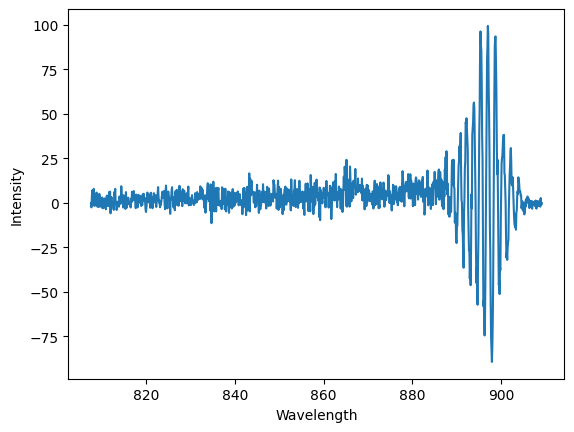

In [12]:
plt.plot(step3, step2[256])
plt.xlabel("Wavelength")
plt.ylabel("Intensity")

### Calculations for Analysis 2.3

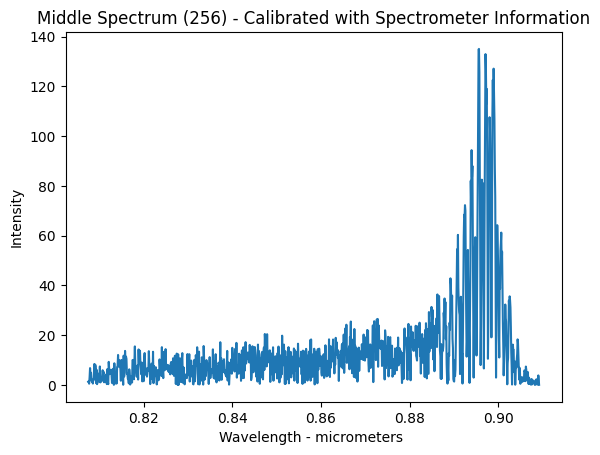

In [13]:
plt.plot(step3*0.001, np.abs(step2[255]))
plt.xlabel("Wavelength - micrometers ")
plt.ylabel("Intensity")
plt.title("Middle Spectrum (256) - Calibrated with Spectrometer Information")
plt.show()

In [14]:
spectrum=np.abs(step2[255])
c_w=step3[spectrum.argmax()]*0.001 
print("The Central Wavelength (in micrometers) = ",c_w)

The Central Wavelength (in micrometers) =  0.895658675460766


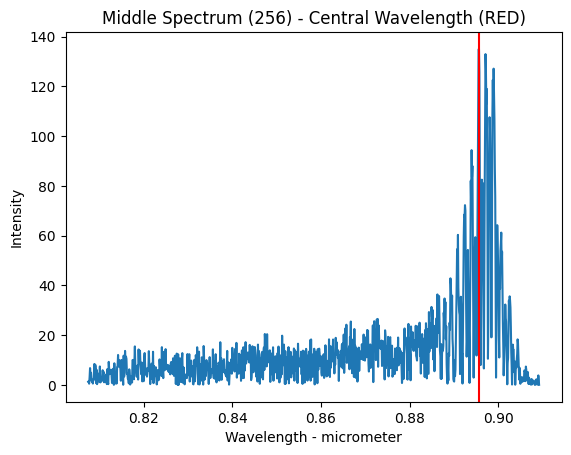

In [15]:

plt.plot(step3*0.001,spectrum)
plt.axvline(x=step3[spectrum.argmax()]*0.001, color='r')
plt.xlabel("Wavelength - micrometer")
plt.ylabel("Intensity")
plt.title("Middle Spectrum (256) - Central Wavelength (RED)")
plt.show()

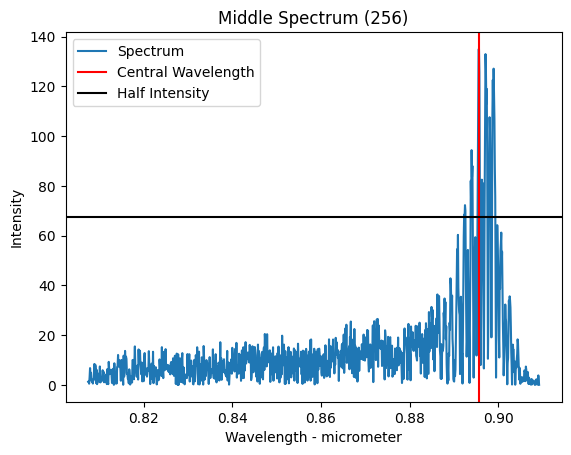

In [16]:
import scipy
spectrum=np.abs(step2[255])
plt.plot(step3*0.001,spectrum, label = "Spectrum")
plt.axvline(x=step3[spectrum.argmax()]*0.001, color='r', label ="Central Wavelength")
plt.axhline(y=(spectrum.max()-spectrum.min())/2, color='black', label = 'Half Intensity')

plt.xlabel("Wavelength - micrometer")
plt.ylabel("Intensity")
plt.title("Middle Spectrum (256)")
plt.legend()
plt.show()

In [17]:
#indices where the intensity is equal to or greater than the half power
indices=np.where(spectrum>=(spectrum.max()-spectrum.min())/2)[0]

#Checking the wavelength range at FWHM power
start_range=step3[indices[0]]
end_range = step3[indices[-1]]

In [18]:
fwhm_wb = 0.001*(end_range-start_range)


In [19]:
print("The FWHM Wavelength Bandwidth (in micrometers) is :",fwhm_wb)

The FWHM Wavelength Bandwidth (in micrometers) is : 0.007012157873607066


$$ Coherence Length  (l_c) = \frac{2*ln(2)}{\pi} * \frac{(\lambda_0)^2}{\delta\lambda} $$
where
$$\lambda_0 = Central Wavelength$$
$$\delta\lambda = FWHM-Wavelength Bandwidth$$

In [20]:
lc = (2*math.log(2)* c_w**2) / (math.pi * fwhm_wb)
print("The coherence length is: ",lc, "micrometers")

The coherence length is:  50.48228129303024 micrometers


## Step 4 - Resampling Wavelength to Wavenumber

The spectrometer is calibrated in wavelength, but the FFT needs data that is linearly spaced in wavenumber as the input. The wavenumber k = 2 π / λ, so we need to match the endpoints of the spectrometer and then generate a linear spacing between the endpoints. You can change the number of points in the array at this step, but we will resample into 1024 points.


$$k_1 = \frac{2π}{λ_{1024}}$$

$$k_{1024} = \frac{2π}{λ_{1}}$$

Various types of resampling can be used, however for this exercise linear resampling is fine.

In [21]:
def resample_wl_wn(wavelengths):
    #Wavelengths is the output from the wavelength calibration (1d array)
    
    #Not Linearly spaced in K space
    k_space=(2*math.pi)/np.flip(wavelengths)
    
    start= (2*math.pi)/wavelengths[-1]
    end= (2*math.pi)/wavelengths[0]
    
    #Linearly spaced in K Space
    wavenumbers=np.linspace(start,end, num=1024)
    
    
    #returns both the non-linearly (1d array) and linearly (1d array) spaced in k space vectors 
    return k_space, wavenumbers

k_space, wavenumbers= resample_wl_wn(step3)

print(k_space.shape)
print(k_space)
print()

print(wavenumbers.shape)
print(wavenumbers)




(1024,)
[0.00691045 0.00691112 0.00691178 ... 0.00777934 0.00778035 0.00778137]

(1024,)
[0.00691045 0.00691131 0.00691216 ... 0.00777967 0.00778052 0.00778137]


Text(0, 0.5, 'Intensity')

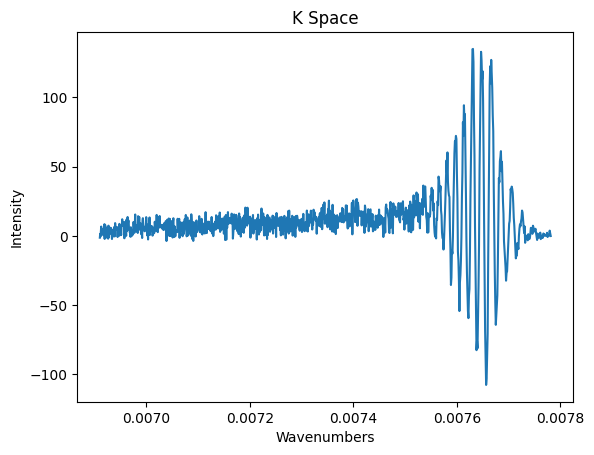

In [22]:
plt.plot(k_space,step2[255])
plt.title("K Space")
plt.xlabel("Wavenumbers")
plt.ylabel("Intensity")

Text(0, 0.5, 'Intensity')

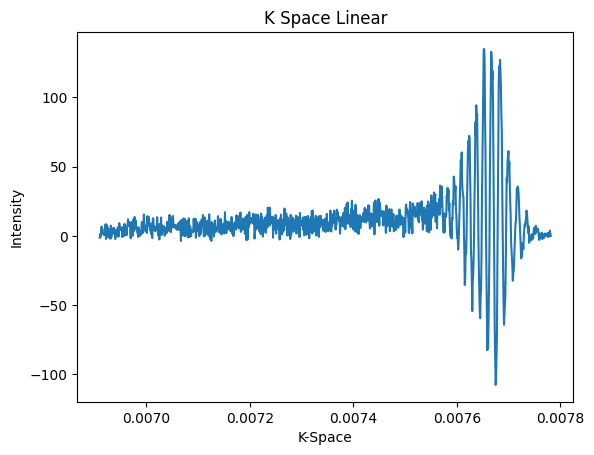

In [23]:
plt.plot(wavenumbers,step2[255])
plt.title("K Space Linear")
plt.xlabel("K-Space")
plt.ylabel("Intensity")

## Step 5 - Dispersion compensation

We will use empirical dispersion compensation for this processing. There are methods to both physically determine the dispersion in an OCT system and methods to numerically optimize the dispersion compensation, but for this exercise, trying numbers until the image “looks good” will be sufficient.
The dispersion compensation takes the form of

$$ D_{1..1024} =e^{-i*(E2*n*n + E3*n*n*n)}$$
Where
n is an array of 1024 numbers running linearly from -1 to 1 \
E2 is an empirically derived number \
E3 is an empirically derived number


In [24]:
from scipy.interpolate import interp1d
def interp(wavenumbers,k_space,img):
    #wavenumbers and k_space are the outputs from resample_wl_wn
    #img is the image after subtracting the background (output from background subtraction)
    
    final_interp=np.array([])
    #Use the interp function to get the interpolated values using the linearly kspace (wavenumbers) and not linearly kspace (k_space)
    for i in range(step2.shape[0]):
        if i==0:
            
            final_interp=np.interp(wavenumbers,k_space,img[i])
        else:
            final_interp = np.vstack((final_interp, np.interp(wavenumbers, k_space,img[i])))
            
    return final_interp

In [25]:
def dispersion_compensation(E2,E3, final_interp):
    #E2 and E3 Integer values that are emperically determined
    #final_interp is the output from the interp function (matrix of shape[aline, pixels])
    
    n = np.linspace(-1,1,num=1024)
    #Creating the dispersion compensation

    dc=math.e**(-1j*((E2*n*n) + (E3*n*n*n)))
    final=np.array([])
    for i in range(final_interp.shape[0]):
        if i==0:
            final=dc*final_interp[i]
        else:
            final = np.vstack((final,dc*final_interp[i]))
            
    return final

In [26]:
step5_initial=interp(wavenumbers,k_space,step2)
step5=dispersion_compensation(E2=-5,E3=0.01, final_interp=step5_initial)



In [27]:
step5

array([[ 8.81807443e+01-2.87495345e+02j, -1.12125816e+00+3.92854378e+00j,
        -6.02140986e-01+2.27752549e+00j, ...,
         2.73725285e-01-1.12485317e+00j,  9.72523039e-01-3.68339331e+00j,
         8.05583347e-01-2.82691000e+00j],
       [-8.36183876e-02+2.72620711e-01j, -3.70477709e-01+1.29803997e+00j,
        -1.94677072e+00+7.36342493e+00j, ...,
         4.42288162e-01-1.81754945e+00j,  4.61961032e-01-1.74965950e+00j,
         2.57465508e-01-9.03484192e-01j],
       [-3.76855473e-01+1.22866047e+00j, -7.69118901e-01+2.69475612e+00j,
        -8.13218893e-01+3.07590215e+00j, ...,
        -1.06679135e-01+4.38389761e-01j, -2.21696190e-01+8.39665724e-01j,
        -1.65934111e-02+5.82287109e-02j],
       ...,
       [-6.70092558e-01+2.18470022e+00j, -1.20405000e+00+4.21862095e+00j,
        -4.46471896e-01+1.68872597e+00j, ...,
         4.54826335e-02-1.86907411e-01j,  2.06680029e-01-7.82792599e-01j,
        -1.65934111e-02+5.82287109e-02j],
       [-8.36183876e-02+2.72620711e-01j,  8.

Text(0, 0.5, 'Absolute Interp^D')

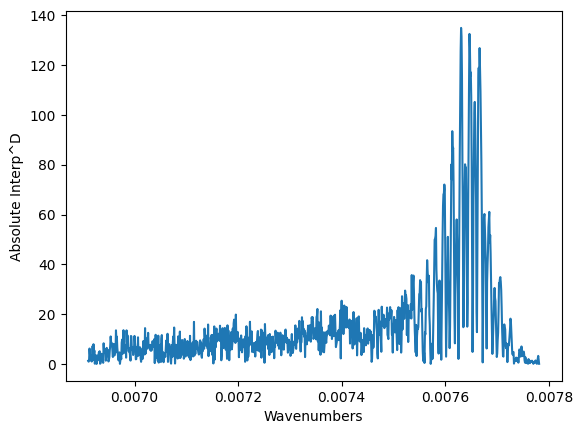

In [28]:
plt.plot(wavenumbers,np.abs(step5)[255])
plt.xlabel("Wavenumbers")
plt.ylabel("Absolute Interp^D")

## Step 6  FFT
Each A-scan is now FFT (fast Fourier transformed). The output will be an array of complex numbers, but we only want the magnitude of each complex number for this processing

In [29]:
def fft_mag(array_after_dc):
    #array_after_dc is the output from dispersion_compensation (matrix of shape[aline, pixels])
    #calculates the fft of the signal and returns the magnide of the complex number
    
    y = np.fft.fft(array_after_dc)
    return np.abs(y)
    '''
    fft_array=[]
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            #Calculating the magnitude of the complex number root(x^2 + y^2)
            #fft_array.append(np.abs(y[i][j]))


            fft_array.append(math.sqrt(y[i][j].real**2 + y[i][j].imag**2))

    fft_array = np.array(fft_array).reshape((y.shape[0],y.shape[1]))
    
    return fft_array
    '''

In [30]:
step6 = fft_mag(step5)
print(step6.shape)
print(step6)

(512, 1024)
[[3959.43693224 4970.8076251  3380.30398345 ... 1256.37727298
  1632.97608885 1858.07098075]
 [1383.69183286 1645.927882   1155.46758246 ...  926.22832497
  1066.74861579 1170.95842769]
 [1705.52474906 2110.34949359 1683.95408712 ...  643.44734663
  1085.90819404 1071.39917788]
 ...
 [2164.26668489 2346.42165881 1520.94930228 ...  739.83165203
  1085.940986   1711.44819782]
 [1838.68357725 1912.06596237 1395.28286421 ...  752.89751682
   773.73137838 1348.73555528]
 [2012.41391373 2047.47403229 1203.29144834 ... 1008.06891966
  1221.96383705 1772.64702622]]


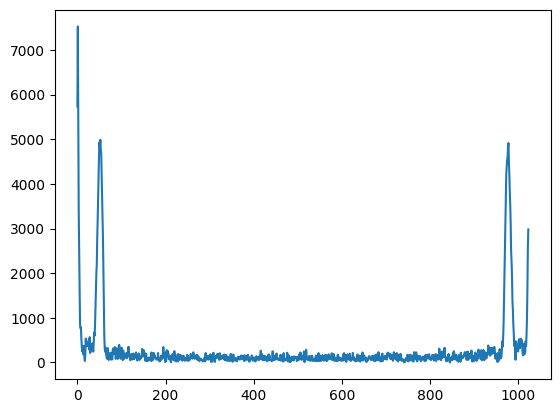

In [31]:
plt.plot(step6[255])

## Step 7 Image Scaling 
The dynamic range of the OCT images is approximately 60 dB. In order to see contrast
across this entire range, log plots are typically used. We will use 20 * log 10 on our data.

In [32]:
def image_scaling(img):
    #img is the output from fft_mag
    
    return 20*np.log10(img)

step7 = image_scaling(step6)

## Step 8 Image display

Plot the image. Set the upper and lower limits to provide maximum contrast on the screen (i.e. match the upper limit to the maximum signal in the image) while minimizing the noise (i.e. set the lower limit so that the noise is reduced, but you don’t lose the lower signal levels).


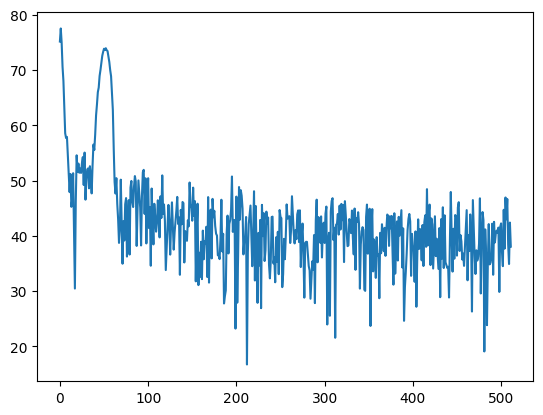

In [33]:
plt.plot(step7[255][:512])

In [34]:
np.clip(step7, 100, step7.max())[:,:512].shape

(512, 512)

Text(0.5, 1.0, 'Generated Image of the Finger Nail')

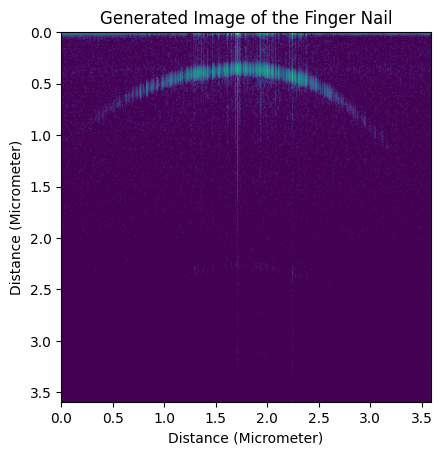

In [35]:
plt.imshow((np.clip(step7,45,step7.max())[:,:512]).T, extent=[0,512*fwhm_wb,512*fwhm_wb,0])
plt.xlabel("Distance (Micrometer)")
plt.ylabel("Distance (Micrometer)")


plt.title("Generated Image of the Finger Nail")

# Pranav Finger

In [36]:
final_image=Image.open("Data/Pranav Finger -20190509-175740.tif")
background=Image.open("Data/BG RAW-RAW-20190509-180149.tif")
raw_image=Image.open("Data/Pranav Finger RAW-RAW-20190509-175735.tif")




(1024, 512)


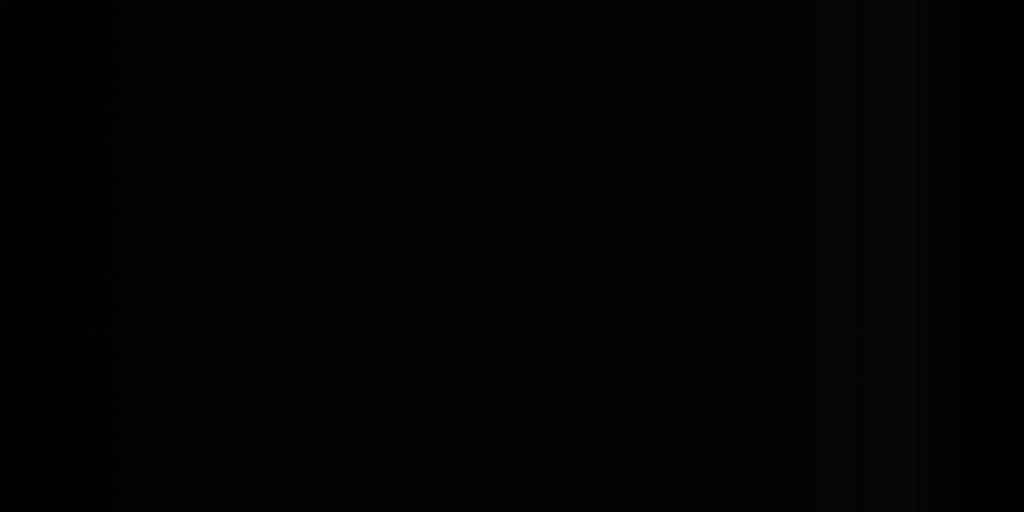

In [37]:
print(raw_image.size)
raw_image

(1024, 512)


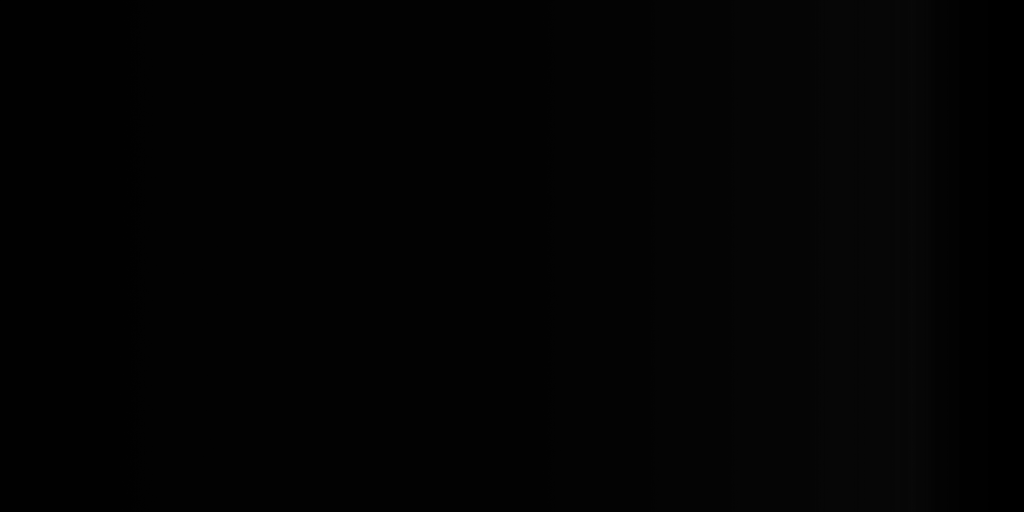

In [38]:
print(background.size)
background

(512, 512)


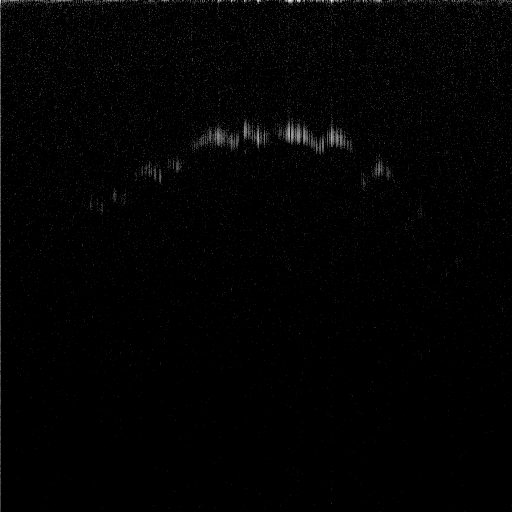

In [39]:
print(final_image.size)
final_image

Text(0.5, 1.0, 'Generated Image of the Finger')

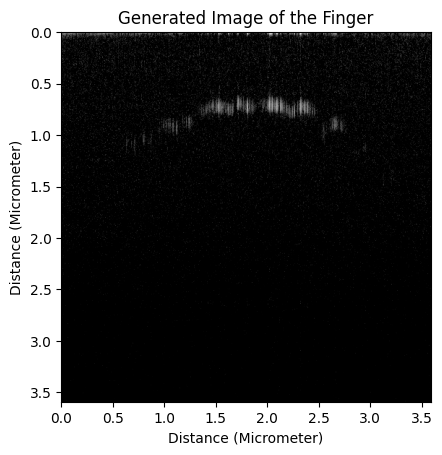

In [40]:

raw=converting_tif_numpy(raw_image)
bg=converting_tif_numpy(background)

step2 = background_subtraction(raw, bg)
step3 = wavelength_calibration()
k_space, wavenumbers= resample_wl_wn(step3)
step5_initial=interp(wavenumbers,k_space,step2)
step5=dispersion_compensation(E2=-5,E3=0, final_interp=step5_initial)

step6 = fft_mag(step5)
step7 = image_scaling(step6)

plt.imshow((np.clip(step7,45,step7.max())[:,:512]).T, cmap='gray', extent=[0,512*fwhm_wb,512*fwhm_wb,0])
plt.xlabel("Distance (Micrometer)")
plt.ylabel("Distance (Micrometer)")

plt.title("Generated Image of the Finger")

# Tape

In [41]:
raw_image=Image.open("Data/Tape_RAW-RAW-20190509-174014.tif")
background=Image.open("Data/BG RAW-RAW-20190509-180149.tif")
final_image=Image.open("Data/Tape-20190509-174021.tif")

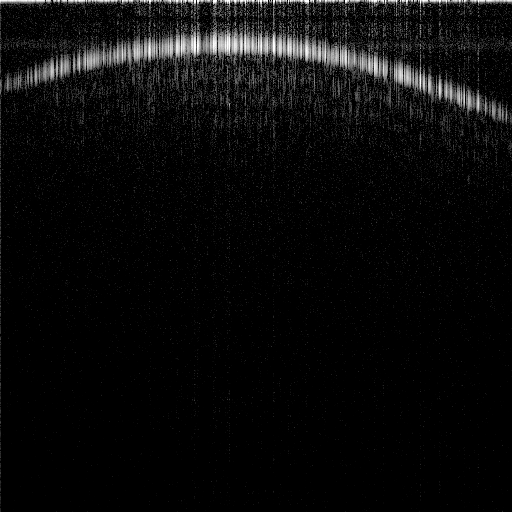

In [42]:
final_image

Text(0.5, 1.0, 'Generated Image of the Tape')

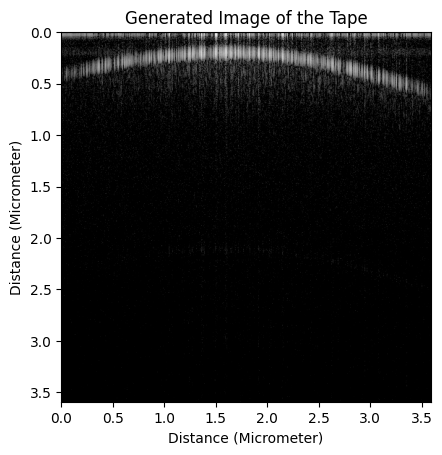

In [43]:

raw=converting_tif_numpy(raw_image)
bg=converting_tif_numpy(background)

step2 = background_subtraction(raw, bg)
step3 = wavelength_calibration()
k_space, wavenumbers= resample_wl_wn(step3)
step5_initial=interp(wavenumbers,k_space,step2)
step5=dispersion_compensation(E2=10,E3=0, final_interp=step5_initial)

step6 = fft_mag(step5)
step7 = image_scaling(step6)


plt.imshow((np.clip(step7,45,step7.max())[:,:512]).T, cmap='gray', extent=[0,512*fwhm_wb,512*fwhm_wb,0])
plt.xlabel("Distance (Micrometer)")
plt.ylabel("Distance (Micrometer)")


plt.title("Generated Image of the Tape")